In [1]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

device = 'cuda'

In [2]:
def visualize_image(image: torch.Tensor, channels: list, patch_size: int = None):
    """Visualize image or a patch of the image"""
    image = torch.clamp(image, 0, 1)
    image = image[channels, :, :]
    
    if patch_size:
        image = image[:, :patch_size, :patch_size]
    
    plt.imshow(image.permute(1, 2, 0))
    plt.show()

In [3]:
def save_img(image, path):
    if torch.is_tensor(image):
        image = image.numpy()
    
    image = (np.moveaxis(image.clip(0, 1), 0, -1) * 255).astype(np.uint8)
    cv2.imwrite(path, image)

### DIV2K

In [4]:
from models import GSASR, EDSR

In [5]:
resblocks = 16
backbone_features = 64
model_features = 180
window_size = 12
num_heads = 4
gaussian_interaction_blocks = 6
raster_ratio = 0.1
gaussian_density = 16
mlp_ratio = 4

In [390]:
# Load RGB model
backbone = EDSR(3, resblocks, backbone_features)
model_rgb = GSASR(backbone, model_features, window_size, num_heads, gaussian_interaction_blocks, 3,
                raster_ratio=raster_ratio, m=gaussian_density, mlp_ratio=mlp_ratio).to(device=device)
model_rgb.load_state_dict(torch.load('/home/msiau/workspace/TFG-Satellite-GSSR/weights/GSatelite_Base.pt')['model'])

/tmp/ipykernel_3030072/3070936676.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_rgb.load_state_dict(torch.load('/home/msiau/workspace/TFG-Satellite-GSSR/weights/

<All keys matched successfully>

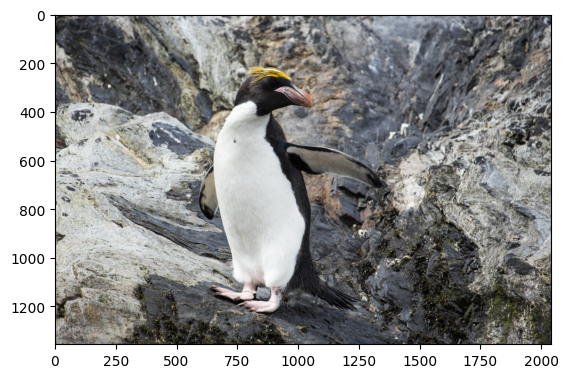

In [410]:
# Load one image, always the same
image_path = '/home/msiau/data/tmp/agarciat/DIV2K/DIV2K_valid_HR/0801.png'
image = (torch.tensor(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB), dtype=torch.float32) / 255).permute(2, 0, 1).contiguous()

visualize_image(image, [0, 1, 2])
# save_img(image[7:10], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/bicubic')

In [382]:
starting_pixel_x = 556
starting_pixel_y = 868

starting_pixel_x=556
starting_pixel_y=868


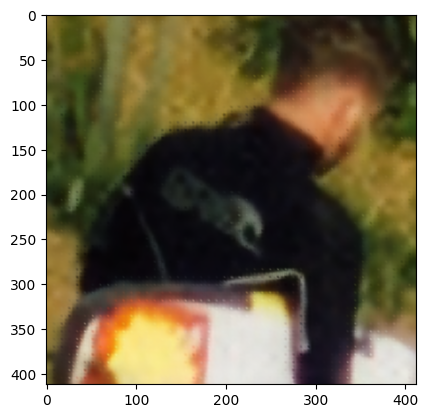

In [406]:
# Generate 1 x4 Image
with torch.no_grad():
    starting_pixel_x += 0
    starting_pixel_y += 0
    print(f'{starting_pixel_x=}')
    print(f'{starting_pixel_y=}')

    output_image_rgb = model_rgb(image[:3, starting_pixel_y:starting_pixel_y+48, starting_pixel_x:starting_pixel_x+48].unsqueeze(0).to(device=device), 8.6).squeeze().to(device='cpu')
    visualize_image(output_image_rgb, [0, 1, 2])

In [409]:
save_img(image[[2, 1, 0], starting_pixel_y:starting_pixel_y+48, starting_pixel_x:starting_pixel_x+48], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/div2k_LR.png')
# save_img(output_image_rgb[:3], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/outputrgb_rgb_x2.png')
save_img(output_image_rgb[[2, 1, 0]], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/div2k_GausSat_x8-6.png')
# save_img(bicubic[:3], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/outputbicubic_rgb_x2.png')

starting_pixel_x=875
starting_pixel_y=276


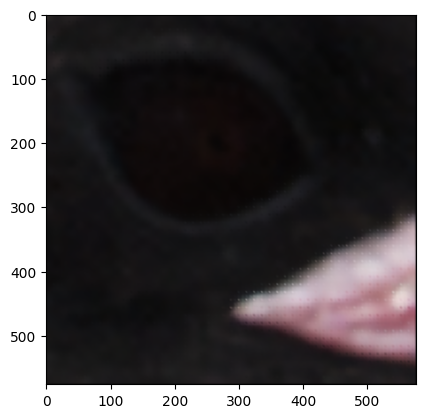

In [187]:
# Generate 1 x4 Image
with torch.no_grad():
    starting_pixel_x += -1
    starting_pixel_y += -1
    print(f'{starting_pixel_x=}')
    print(f'{starting_pixel_y=}')

    output_image_rgb = model_rgb(image[:3, starting_pixel_y:starting_pixel_y+48, starting_pixel_x:starting_pixel_x+48].unsqueeze(0).to(device=device), 12).squeeze().to(device='cpu')
    visualize_image(output_image_rgb, [0, 1, 2])

### Sentinel-2

In [3]:
from models import GSASR, EDSR

In [4]:
# x4 scale
# - 1 LR image
# - 1 Output image from RGB variant
# - 1 Output image from MS variant

/tmp/ipykernel_3025769/4172066348.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(image_path)


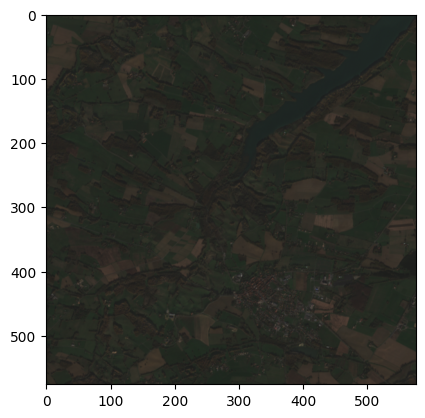

In [16]:
# Load one image, always the same
image_path = '/home/msiau/data/tmp/agarciat/Sentinel-2/test/processed_data/0001.pt'
image = torch.load(image_path)
visualize_image(image, [2, 1, 0])
# save_img(image[7:10], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/bicubic')

In [7]:
resblocks = 16
backbone_features = 64
model_features = 180
window_size = 12
num_heads = 4
gaussian_interaction_blocks = 6
raster_ratio = 0.1
gaussian_density = 16
mlp_ratio = 4

In [8]:
# Load RGB model
backbone = EDSR(3, resblocks, backbone_features)
model_rgb = GSASR(backbone, model_features, window_size, num_heads, gaussian_interaction_blocks, 3,
                raster_ratio=raster_ratio, m=gaussian_density, mlp_ratio=mlp_ratio).to(device=device)
model_rgb.load_state_dict(torch.load('/home/msiau/workspace/TFG-Satellite-GSSR/weights/GSatelite_RGB2.pt')['model'])

/tmp/ipykernel_3025769/1009584567.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_rgb.load_state_dict(torch.load('/home/msiau/workspace/TFG-Satellite-GSSR/weights/

<All keys matched successfully>

In [9]:
# Load MS model
backbone = EDSR(12, resblocks, backbone_features)
model_ms = GSASR(backbone, model_features, window_size, num_heads, gaussian_interaction_blocks, 12,
                raster_ratio=raster_ratio, m=gaussian_density, mlp_ratio=mlp_ratio).to(device=device)
model_ms.load_state_dict(torch.load('/home/msiau/workspace/TFG-Satellite-GSSR/weights/GSatelite_MS2.pt')['model'])

/tmp/ipykernel_3025769/1522642174.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_ms.load_state_dict(torch.load('/home/msiau/workspace/TFG-Satellite-GSSR/weights/G

<All keys matched successfully>

In [10]:
starting_pixel_x = 380
starting_pixel_y = 461

In [11]:
from matlab_functions import imresize

starting_pixel_x=380
starting_pixel_y=461


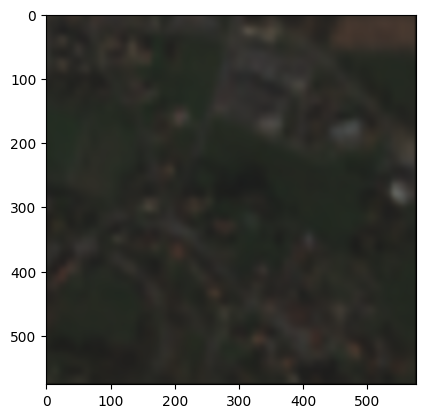

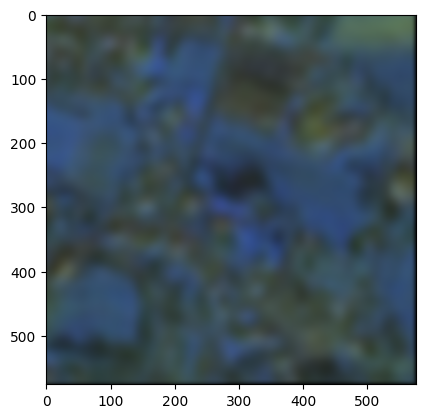

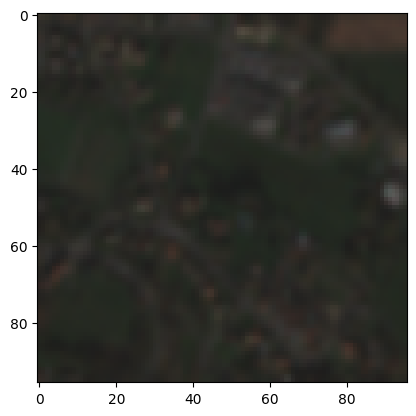

In [17]:
# Generate 1 x4 Image
with torch.no_grad():
    starting_pixel_x += 0
    starting_pixel_y += 0
    print(f'{starting_pixel_x=}')
    print(f'{starting_pixel_y=}')

    output_image_rgb = model_rgb(image[:3, starting_pixel_y:starting_pixel_y+48, starting_pixel_x:starting_pixel_x+48].unsqueeze(0).to(device=device), 12).squeeze().to(device='cpu')
    visualize_image(output_image_rgb, [2, 1, 0])

    output_image_ms = model_ms(image[:, starting_pixel_y:starting_pixel_y+48, starting_pixel_x:starting_pixel_x+48].unsqueeze(0).to(device=device), 12).squeeze().to(device='cpu')
    visualize_image(output_image_ms, [8, 7, 6]) 

    bicubic = imresize(image[:3, starting_pixel_y:starting_pixel_y+48, starting_pixel_x:starting_pixel_x+48], 2)
    visualize_image(bicubic, [2, 1, 0])

In [18]:
# save_img(image[:3, starting_pixel_y:starting_pixel_y+48, starting_pixel_x:starting_pixel_x+48], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/lr_rgb_x2.png')
# save_img(output_image_rgb[:3], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/outputrgb_rgb_x2.png')
save_img(output_image_ms[7:10], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/hfn_ablation.png')
# save_img(bicubic[:3], '/home/msiau/workspace/TFG-Satellite-GSSR/figures/outputbicubic_rgb_x2.png')

### Fancy Sentinel-2 images

scale=tensor(1.)
Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x1_00-0.png


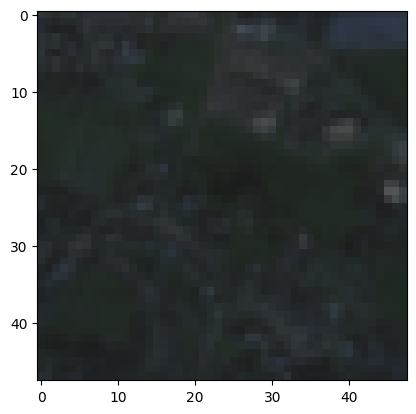

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x1_00-1.png


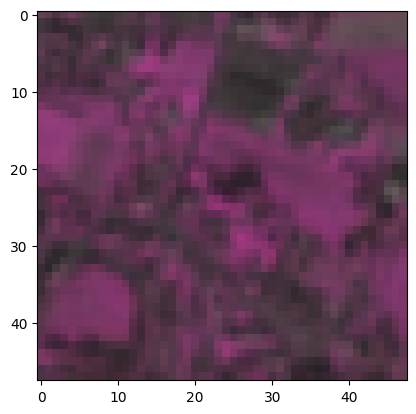

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x1_00-2.png


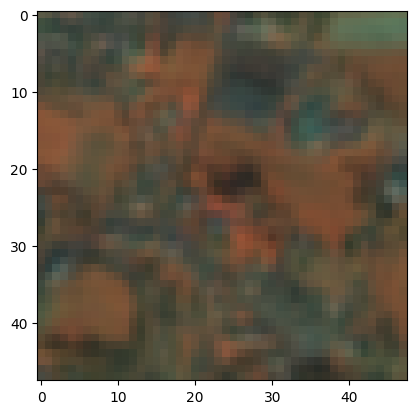

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x1_00-3.png


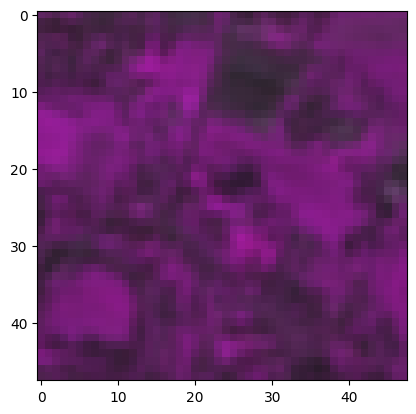

scale=tensor(2.2500)
Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x2_25-0.png


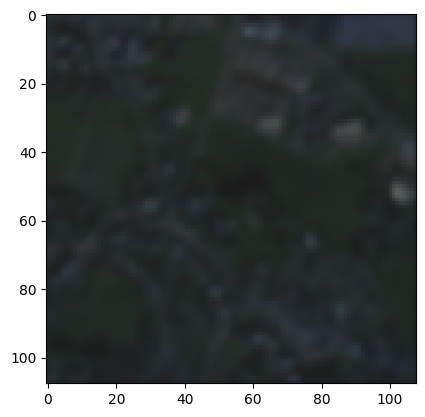

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x2_25-1.png


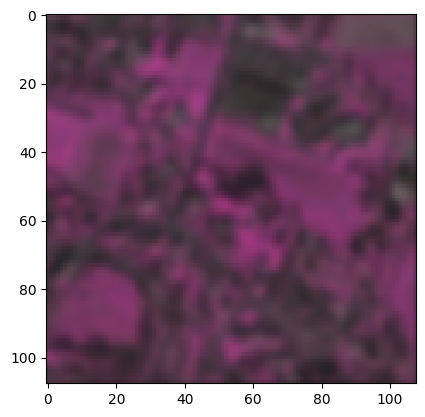

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x2_25-2.png


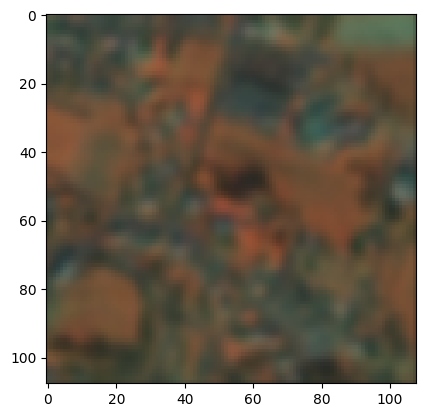

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x2_25-3.png


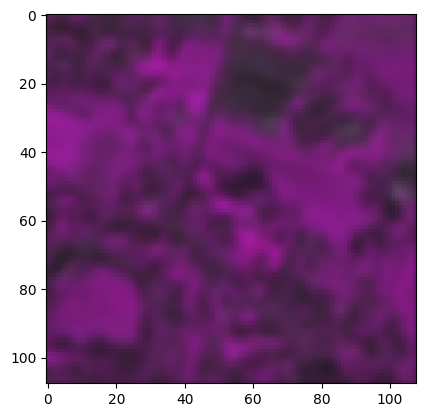

scale=tensor(3.5000)
Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x3_50-0.png


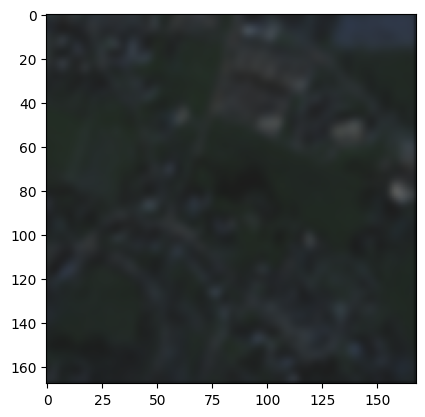

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x3_50-1.png


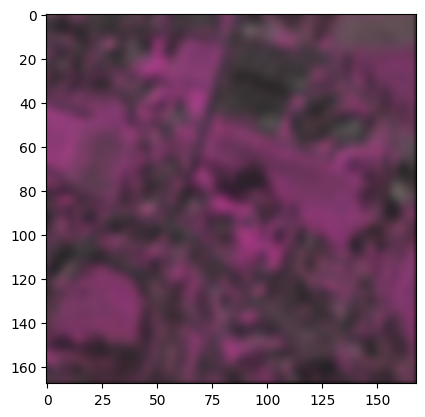

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x3_50-2.png


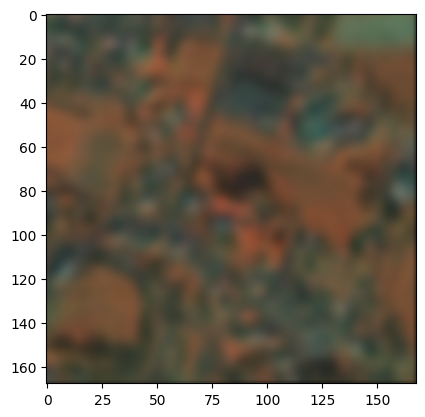

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x3_50-3.png


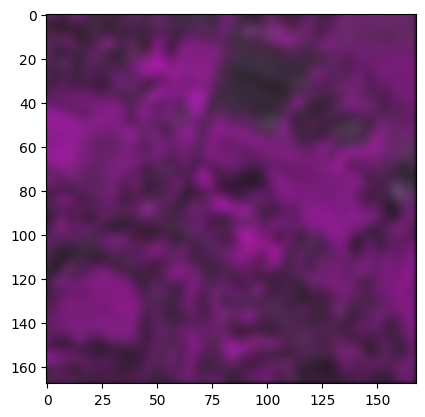

scale=tensor(4.7500)
Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x4_75-0.png


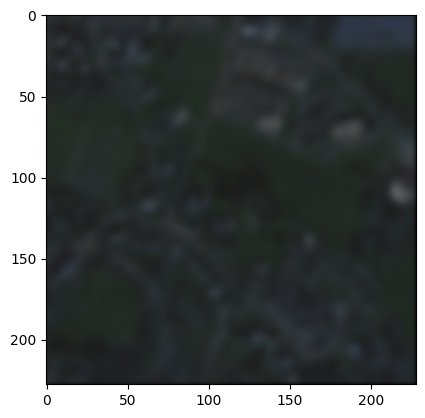

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x4_75-1.png


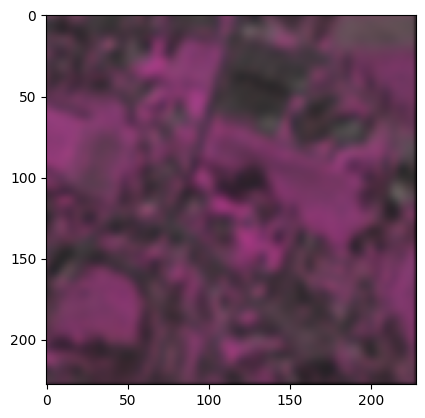

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x4_75-2.png


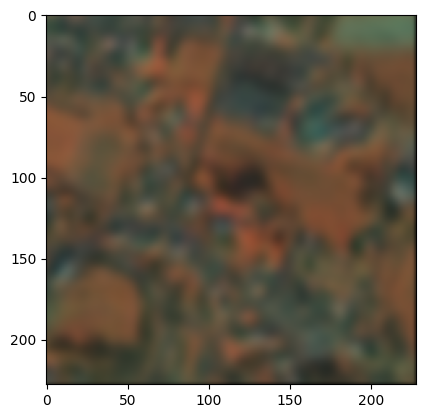

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x4_75-3.png


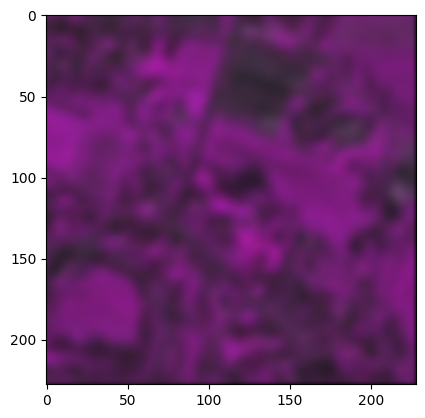

scale=tensor(6.)
Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x6_00-0.png


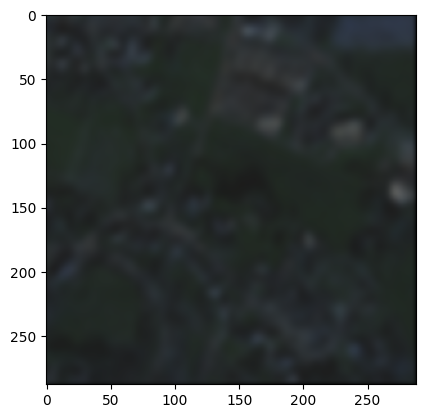

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x6_00-1.png


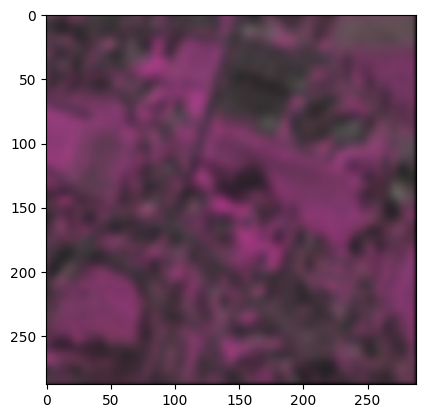

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x6_00-2.png


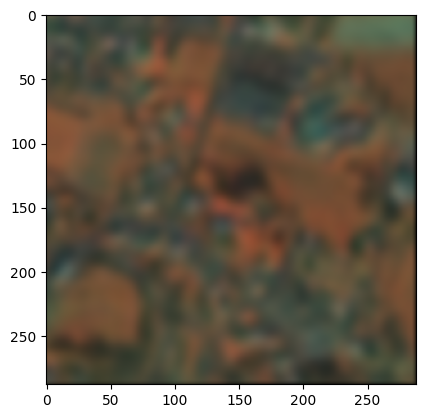

Saved image at /home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x6_00-3.png


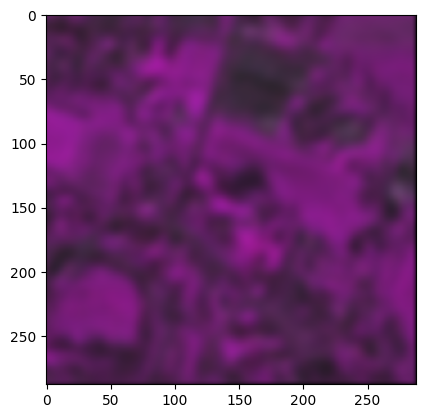

In [14]:
lr_image = image[:, starting_pixel_y:starting_pixel_y+48, starting_pixel_x:starting_pixel_x+48]
for channel in range(0, 12, 3):
    save_img(lr_image[channel:channel+3], f'/home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/lr_{channel // 3}.png')
with torch.no_grad():
    for scale in torch.linspace(1, 6, 5):
        print(f'{scale=}')
        output_image = model_ms(lr_image.unsqueeze(0).to(device=device), scale.item()).squeeze().to(device='cpu')
        for channel in range(0, 12, 3):
            # visualize_image(output_image[channel:channel+3])
            scale_str = f"{scale:.2f}".replace(".", "_")
            path = f'/home/msiau/workspace/TFG-Satellite-GSSR/figures/fancy/output-x{scale_str}-{channel // 3}.png'
            print(f'Saved image at {path}')
            visualize_image(output_image, [channel, channel+1, channel+2], )
            save_img(output_image[channel:channel+3], path)
        